<a href="https://colab.research.google.com/github/harsh-jaiswal13/NLP/blob/main/Text_classification_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time 

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 106MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/nlp-getting-started.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [166]:
df=pd.read_csv('/content/train.csv')

In [137]:
df.shape

(7613, 5)

In [138]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [139]:
print(len(df[df['target']==0]))
print(len(df[df['target']==1]))

4342
3271


In [140]:
df.sample(10)

,id,keyword,location,text,target
6183,8825,sirens,"Nanaimo, BC, Canada",Photoset: hakogaku: ?åÊI am a kurd. i was born...,1
926,1341,blown%20up,The 5th Dimension.,White family (supposedly representing America'...,1
172,247,ambulance,Jackson,http://t.co/AY6zzcUpnz Twelve feared killed in...,1
4351,6181,hijack,NaN,Swansea Û÷plot hijack transfer move for South...,1
2940,4225,drowned,NaN,Toddler drowned in bath after mum left room to...,1
2286,3281,demolish,"ATL, GA",@MarioMaraczi I'm watching it right now. He f...,0
3106,4457,electrocuted,Edinburgh,@That_fat_guy there's literally a video of an ...,0
5739,8190,rescuers,NaN,Fears over missing migrants in Med: Rescuers s...,1
1090,1575,bomb,NaN,The Guardian view on the Hiroshima legacy: sti...,1
2953,4244,drowned,NaN,HOPE THE DROWNED @eeasterling_2,0


In [167]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [168]:
df['text']=df['text'].apply(remove_html_tags)

In [143]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [169]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [170]:
df['text']=df['text'].apply(remove_url)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [146]:
import string
string.punctuation
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [171]:
df['text']=df['text'].apply(remove_punc)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1


In [148]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [175]:
df['text']=df['text'].str.lower()

In [176]:
df['text']=df['text'].apply(remove_stopwords)

In [177]:
df.sample(15)

,id,keyword,location,text,target
6884,9869,traumatised,dublin,ianokavo96 hes still traumatised,0
2929,4210,drowned,NaN,new different fnaf fanfiction trixiedrowned 2 ...,0
6714,9616,thunderstorm,Jupiter,usnwsgov severe weather statement issued augus...,1
1808,2598,crash,NaN,man killed crash barrington hills hoffman est...,1
5872,8389,ruin,CA ??DC,people id let ruin life soul cervix everything...,0
5065,7221,natural%20disaster,"Aurora, IL",added video youtube playlist natural disaster...,0
5957,8508,screaming,"Moore, OK",noahshack hes hot amp sing im screaming,0
6252,8934,snowstorm,Porthcawl,liked youtube video boeing 737 takeoff snowst...,1
356,513,army,Studio,build army 100 dogs leader lion dogs fight li...,1
5193,7414,obliterated,The dark,sweet2young came fucking moved entire existe...,0


In [154]:
from collections import Counter


In [178]:
def counter_word(text_col):
  count =Counter()
  for text in text_col.values:
    for word in text.split():
      count[word]+=1
  return count

counter =counter_word(df.text)

In [179]:
len(counter)

17971

In [180]:
num_unique_words=len(counter)

In [181]:
counter.most_common(5)

[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229)]

In [161]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"(our, deeds, , reason, , earthquake, may, ...",1
1,4,NaN,NaN,"(forest, fire, near, la, ronge, sask, canada)",1
2,5,NaN,NaN,"(all, residents, asked, , shelter, , place, ...",1
3,6,NaN,NaN,"(13000, people, receive, wildfires, evacuation...",1
4,7,NaN,NaN,"(just, got, sent, , photo, , ruby, alaska, ...",1


In [162]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']),df['target'], test_size=0.33, random_state=42)

In [183]:
# type(X_train)
X_train=X_train.text.to_numpy()
X_test=X_test.text.to_numpy()

# X_train

In [184]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=num_unique_words)

tokenizer.fit_on_texts(X_train)

In [185]:
# num_unique_words
word_index=tokenizer.word_index

In [186]:
len(word_index)

13889

In [187]:
train_seq=tokenizer.texts_to_sequences(X_train)
val_seq=tokenizer.texts_to_sequences(X_test)

In [189]:
print(train_seq[0])
# len(train_seq)

[163, 5005, 5006, 242, 563]


In [191]:
# from tens
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length=20
train_padded=pad_sequences(train_seq,maxlen=max_length,padding='post',truncating='post')
val_padded=pad_sequences(val_seq,maxlen=max_length,padding='post',truncating='post')



In [193]:
train_padded[10]

array([5016, 5017,  565, 5018,   15, 5019, 5020, 1971,   15, 5021, 5022,
        105, 5023, 5024,    0,    0,    0,    0,    0,    0], dtype=int32)

In [194]:
reverse_word_index=dict([(idx,word) for (word,idx) in word_index.items()])

In [196]:
def decode(sequence):
  return " ".join([reverse_word_index.get(idx,"?") for idx in sequence])

In [201]:
decoded_text=decode(train_seq[10])
print(train_seq[10])
print(decoded_text)

onufrance 7475 bioterrorism rockefellerchirockefellerunivheiress 2 evade lgl efforts 2 prosecute blks 4 harvardu kidnapgafp


In [202]:
from tensorflow.keras import layers

In [205]:
model=keras.models.Sequential()
model.add(layers.Embedding(num_unique_words,32,input_length=max_length))


model.add(layers.LSTM(64,dropout=.1))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 32)            575072    
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 599,969
Trainable params: 599,969
Non-trainable params: 0
_________________________________________________________________


In [209]:
loss=keras.losses.BinaryCrossentropy(from_logits=False)
optim=keras.optimizers.Adam(lr=.01)
metrics=['accuracy']
model.compile(loss=loss,optimizer=optim,metrics=metrics)


In [212]:
history=model.fit(train_padded,y_train,epochs=20,validation_data=(val_padded,y_test),verbose=2)

Epoch 1/20
160/160 - 3s - loss: 0.0220 - accuracy: 0.9871 - val_loss: 1.6856 - val_accuracy: 0.7537 - 3s/epoch - 19ms/step
Epoch 2/20
160/160 - 3s - loss: 0.0200 - accuracy: 0.9888 - val_loss: 1.6824 - val_accuracy: 0.7497 - 3s/epoch - 18ms/step
Epoch 3/20
160/160 - 3s - loss: 0.0197 - accuracy: 0.9871 - val_loss: 1.7278 - val_accuracy: 0.7529 - 3s/epoch - 20ms/step
Epoch 4/20
160/160 - 3s - loss: 0.0220 - accuracy: 0.9878 - val_loss: 1.6126 - val_accuracy: 0.7533 - 3s/epoch - 18ms/step
Epoch 5/20
160/160 - 4s - loss: 0.0259 - accuracy: 0.9867 - val_loss: 1.6736 - val_accuracy: 0.7433 - 4s/epoch - 24ms/step
Epoch 6/20
160/160 - 4s - loss: 0.0249 - accuracy: 0.9859 - val_loss: 1.5781 - val_accuracy: 0.7378 - 4s/epoch - 23ms/step
Epoch 7/20
160/160 - 4s - loss: 0.0222 - accuracy: 0.9884 - val_loss: 1.6744 - val_accuracy: 0.7465 - 4s/epoch - 28ms/step
Epoch 8/20
160/160 - 4s - loss: 0.0203 - accuracy: 0.9871 - val_loss: 1.8078 - val_accuracy: 0.7409 - 4s/epoch - 27ms/step
Epoch 9/20
160/1

In [213]:
predictions=model.predict(train_padded)
predictions=[1 if p>.5 else 0 for p in predictions]

160/160 [==============================] - 1s 4ms/step


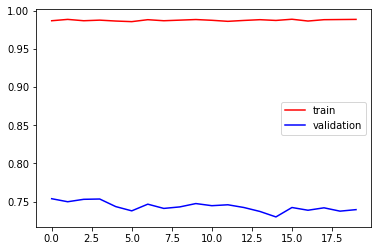

In [214]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


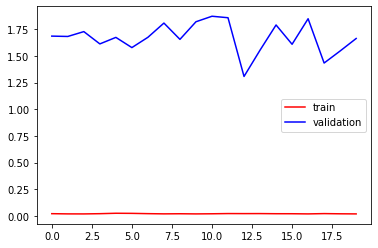

In [215]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()